# SVR 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# importing the data 

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [20]:
x = dataset.iloc[:,1:2].values

y = dataset.iloc[:,2].values
y = y.reshape(-1, 1)
y.shape

(10, 1)

# we dont need to do a preprocessing data 

In [18]:
from sklearn.preprocessing import StandardScaler

In [21]:
# we need to scall the data here cause is not includ in SVR
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


# fit our model 

In [22]:
from sklearn.svm import SVR

In [23]:
'''
 C : penalty parameter to play with to regulate the overfitting
 Kernel:  the kernel methode you want o use
 
'''

svr = SVR(kernel="rbf")
svr.fit(x,y)

/home/ahmed/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
# predicting the result 

In [25]:
predict  = sc_y.inverse_transform(svr.predict(sc_x.transform(np.array([[6.5]]))))

In [26]:
predict

array([170370.0204065])

# visualisation 

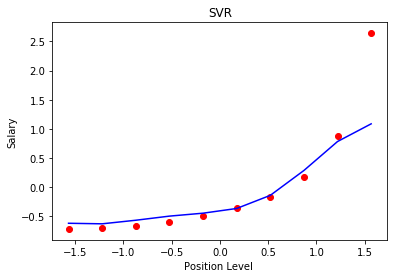

In [35]:
# a higher resolution 
x_grid = np.arange(min(x),max(x),0.001)
x_grid = x_grid.reshape((len(x_grid),1))

plt.scatter(x,y,color = "red")
plt.plot(x,svr.predict(x),color="blue")
plt.title("SVR")
plt.xlabel("Position Level ")
plt.ylabel("Salary")
plt.show()